# Going to use Feature selection methods


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 44kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold,KFold,GroupKFold
from sklearn.utils import resample
from catboost import CatBoostClassifier
from sklearn.preprocessing import KBinsDiscretizer

# Data Analysis

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Zindi/Train (1).csv")
test = pd.read_csv("/content/drive/My Drive/Zindi/Test (1).csv")
submission = pd.read_csv("/content/drive/My Drive/Zindi/SampleSubmission.csv")

## Check null and basic class counts and so on

In [ ]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [ ]:
test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

In [ ]:
train['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [ ]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [ ]:
def combine_df(train,test):
  train['is_train'] = 1
  test['is_train'] = 0
  return pd.concat([train,test],axis=0)
combined = combine_df(train,test)

In [ ]:
combined.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,is_train
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no,1
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no,1
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no,1
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no,1


# Missingno

In [ ]:
combined.isnull().sum()

Applicant_ID          0
form_field1        3639
form_field2        5553
form_field3         501
form_field4         501
form_field5         501
form_field6       18964
form_field7        7394
form_field8       18964
form_field9       11408
form_field10        502
form_field11      44819
form_field12      14078
form_field13       8352
form_field14          0
form_field15      32067
form_field16      18510
form_field17      15846
form_field18      14771
form_field19          4
form_field20        502
form_field21      22561
form_field22      29124
form_field23      40248
form_field24      18902
form_field25       7706
form_field26      10610
form_field27      13209
form_field28        502
form_field29        502
form_field30      36417
form_field31      56218
form_field32       7706
form_field33       1751
form_field34        502
form_field35      33014
form_field36       2898
form_field37       7706
form_field38        502
form_field39       6040
form_field40      62557
form_field41    

In [ ]:
import missingno

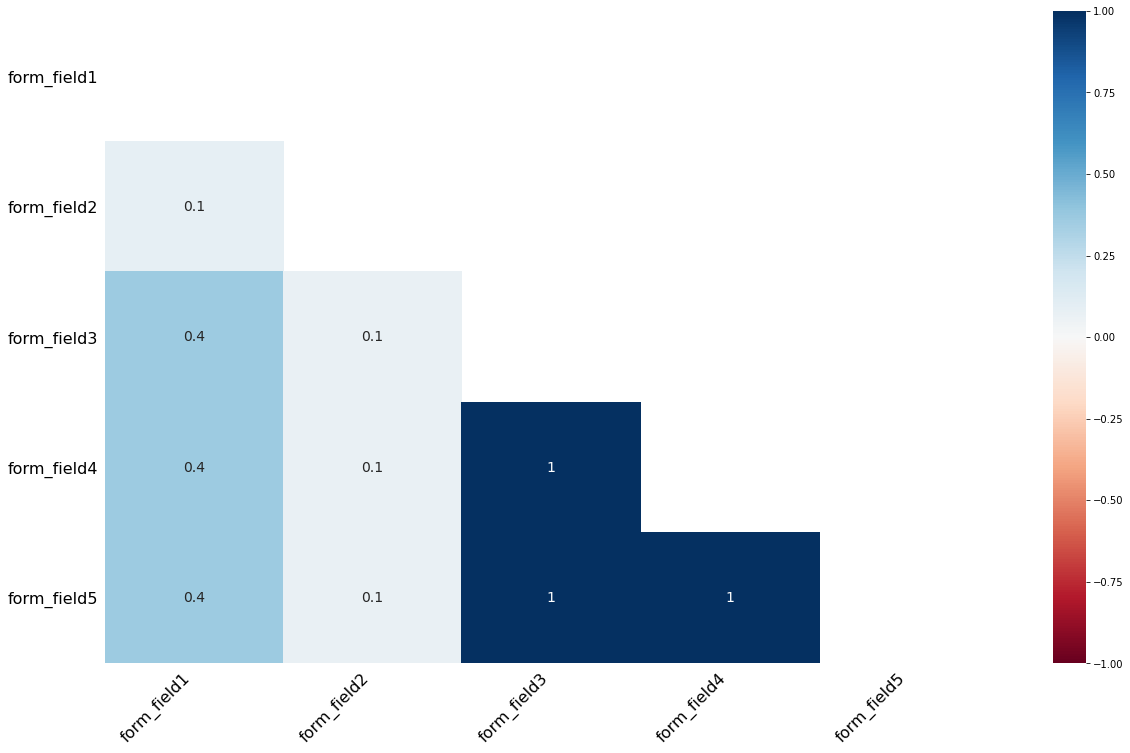

In [ ]:
missingno.heatmap(combined[['form_field1','form_field2','form_field3','form_field4','form_field5']])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
it = IterativeImputer()
form345 = it.fit_transform(combined[['form_field3','form_field4','form_field5']])

In [ ]:
combined[['form_field3','form_field4','form_field5']] = form345

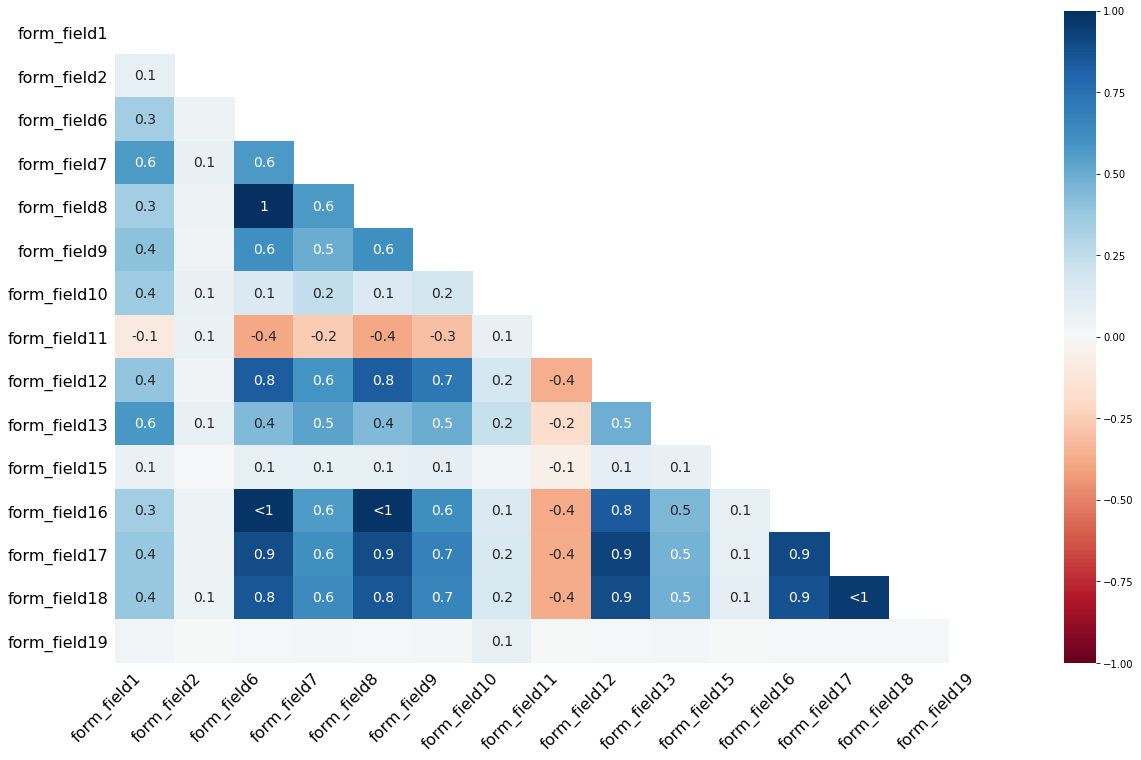

In [ ]:
missingno.heatmap(combined.iloc[:,:20])

In [ ]:
it1 = IterativeImputer()
forms = it1.fit_transform(combined[['form_field6','form_field7','form_field8','form_field9','form_field12','form_field13','form_field16','form_field17','form_field18']])

In [ ]:
combined[['form_field6','form_field7','form_field8','form_field9','form_field12','form_field13','form_field16','form_field17','form_field18']] = forms

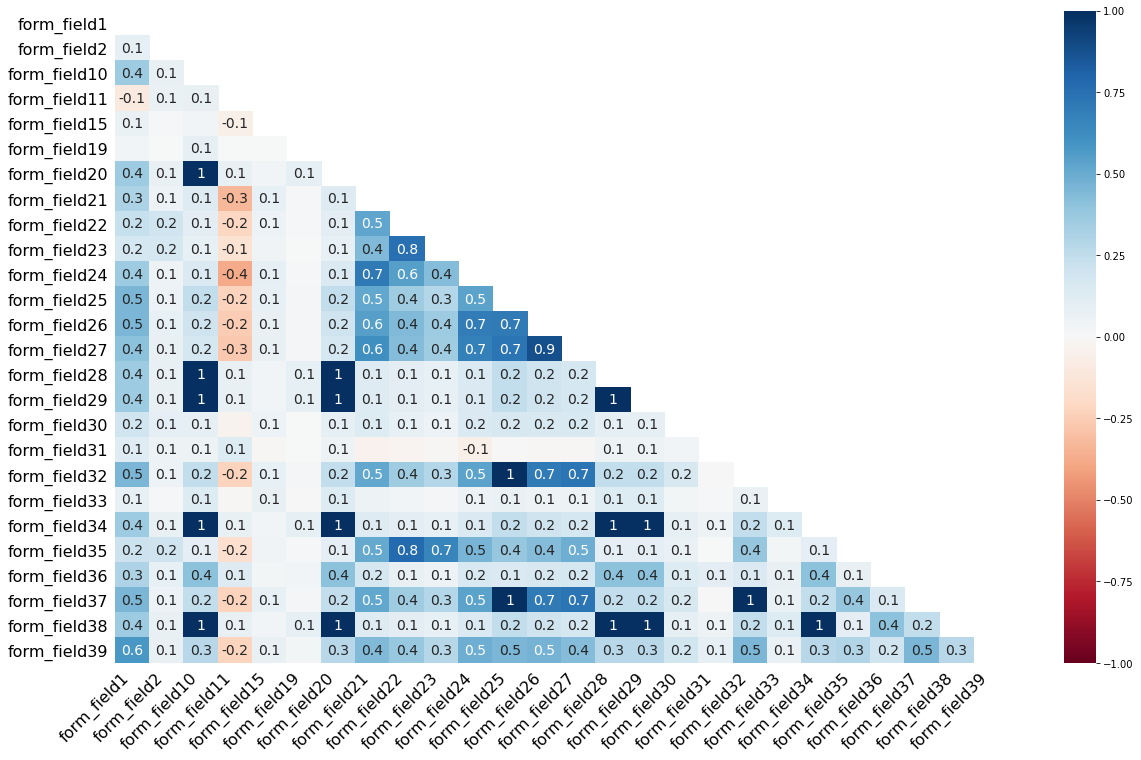

In [ ]:
missingno.heatmap(combined.iloc[:,:40])

In [ ]:
it2 = IterativeImputer()
forms2 = it2.fit_transform(combined[['form_field10','form_field20','form_field28','form_field29','form_field34']])
combined[['form_field10','form_field20','form_field28','form_field29','form_field34']] = forms2

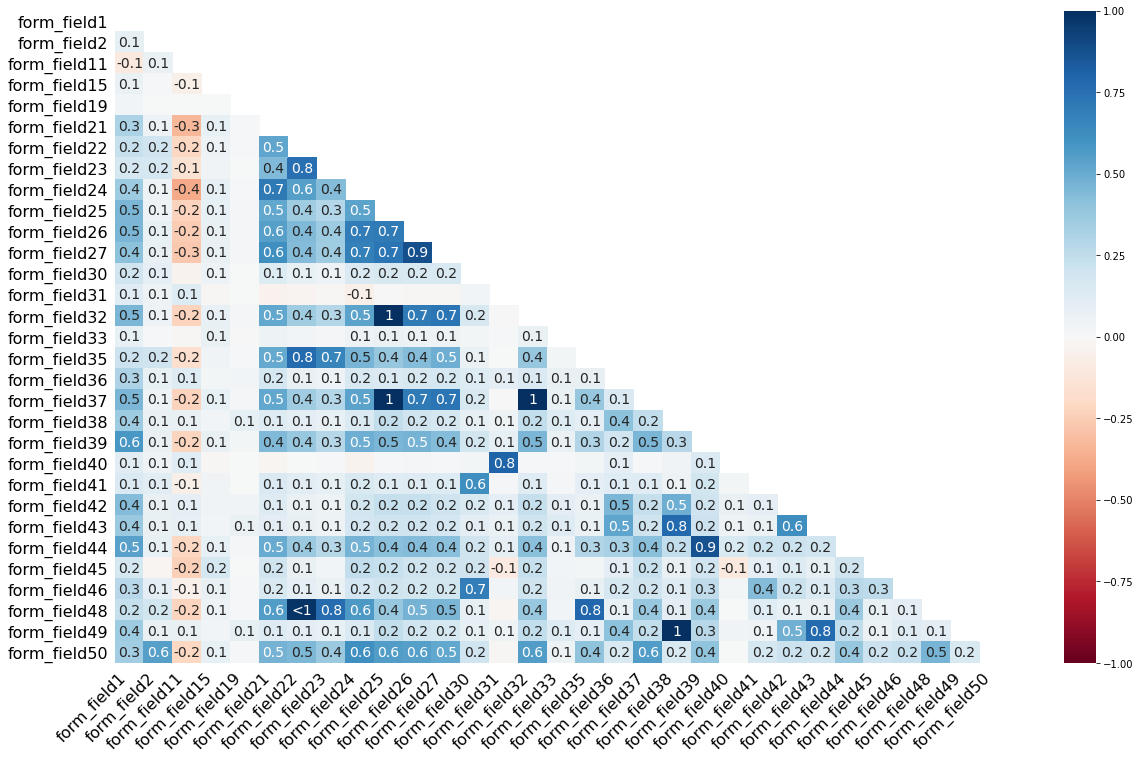

In [ ]:
missingno.heatmap(combined.iloc[:,:51])

In [ ]:
it3 = IterativeImputer()
forms3 = it3.fit_transform(combined[['form_field2','form_field21','form_field22','form_field24','form_field25','form_field26','form_field27','form_field32','form_field37','form_field48']])
combined[['form_field2','form_field21','form_field22','form_field24','form_field25','form_field26','form_field27','form_field32','form_field37','form_field48']] = forms3

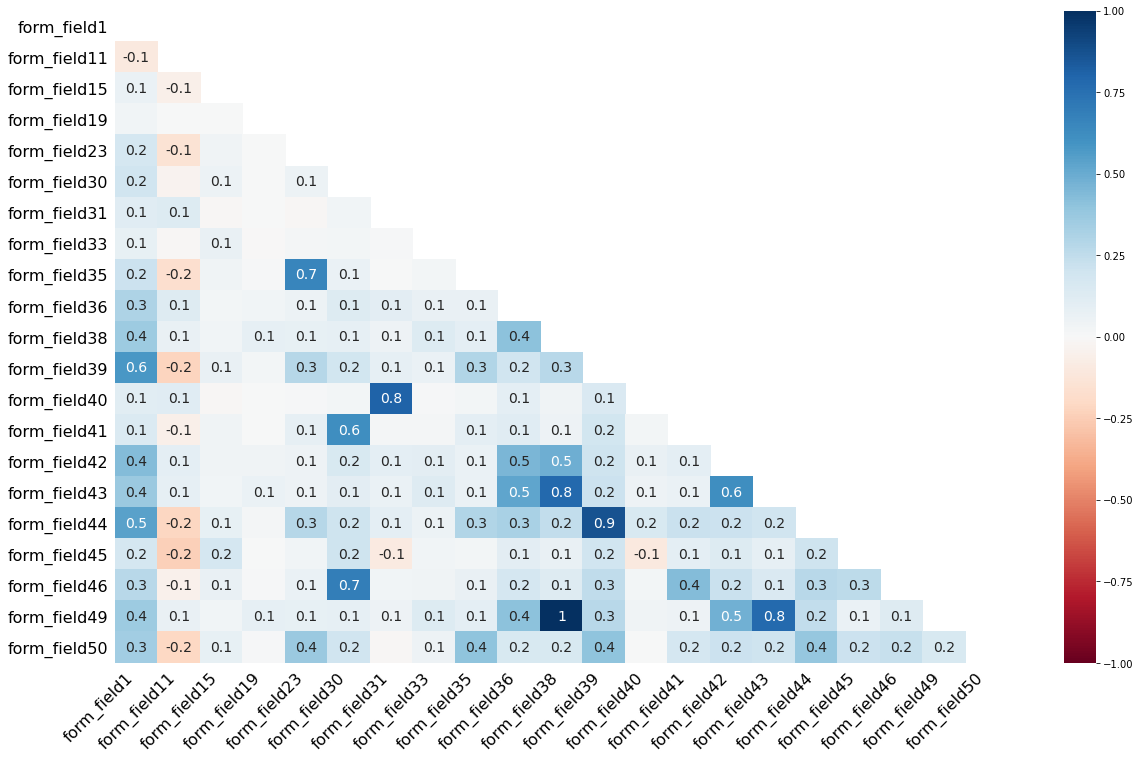

In [ ]:
missingno.heatmap(combined.iloc[:,:51])

In [ ]:
it4 = IterativeImputer()
myforms = it4.fit_transform(combined[['form_field1','form_field39']])
combined[['form_field1','form_field39']] = myforms

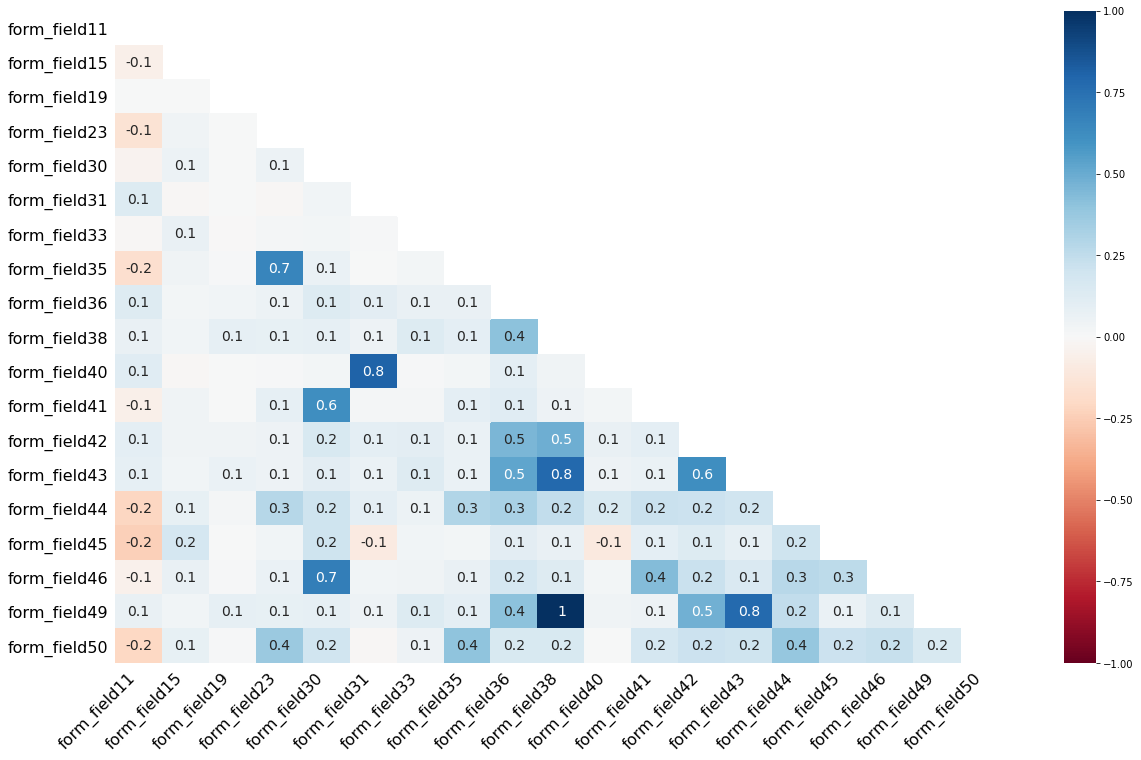

In [ ]:
missingno.heatmap(combined.iloc[:,:51])

In [ ]:
it5 = IterativeImputer()
form_it5 = it5.fit_transform(combined[['form_field38','form_field42','form_field43']])
combined[['form_field38','form_field42','form_field43']] = form_it5

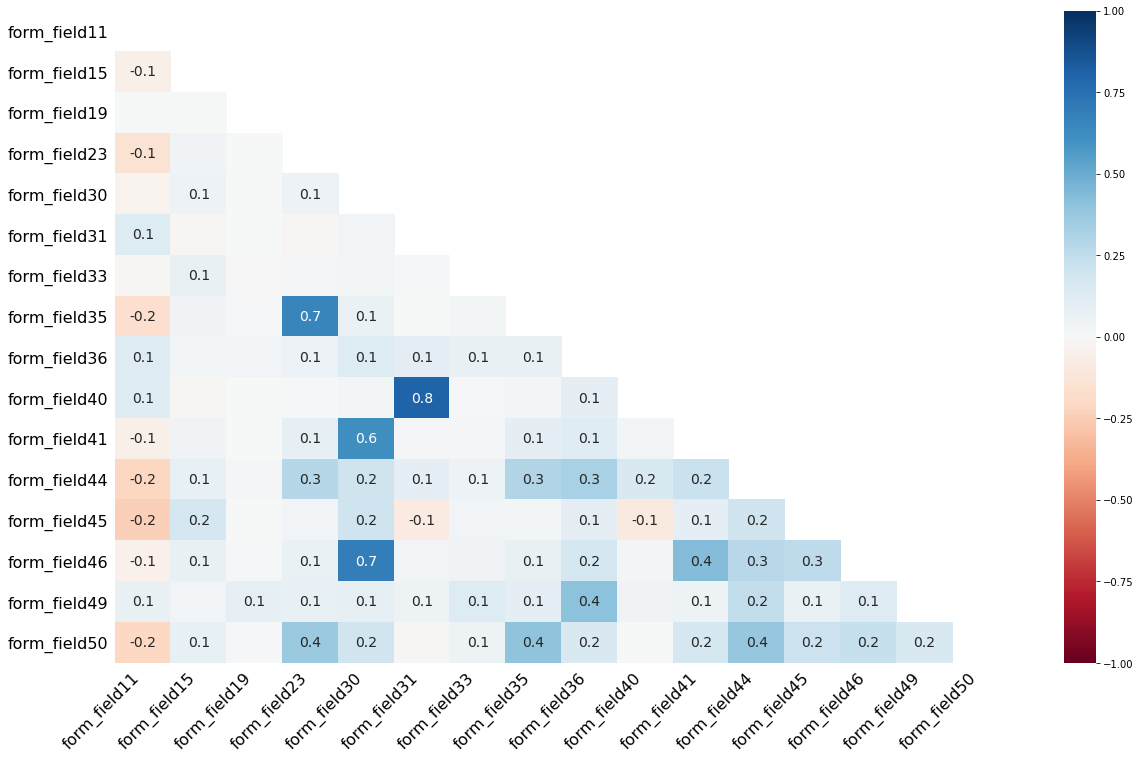

In [ ]:
missingno.heatmap(combined.iloc[:,:51])

In [ ]:
it6 = IterativeImputer()
forms6 = it6.fit_transform(combined[['form_field35','form_field23']])
combined[['form_field35','form_field23']] = forms6

it7 = IterativeImputer()
forms7 = it7.fit_transform(combined[['form_field30','form_field46','form_field41']])
combined[['form_field30','form_field46','form_field41']] = forms7

it8 = IterativeImputer()
forms8 = it8.fit_transform(combined[['form_field31','form_field40']])
combined[['form_field31','form_field40']] = forms8

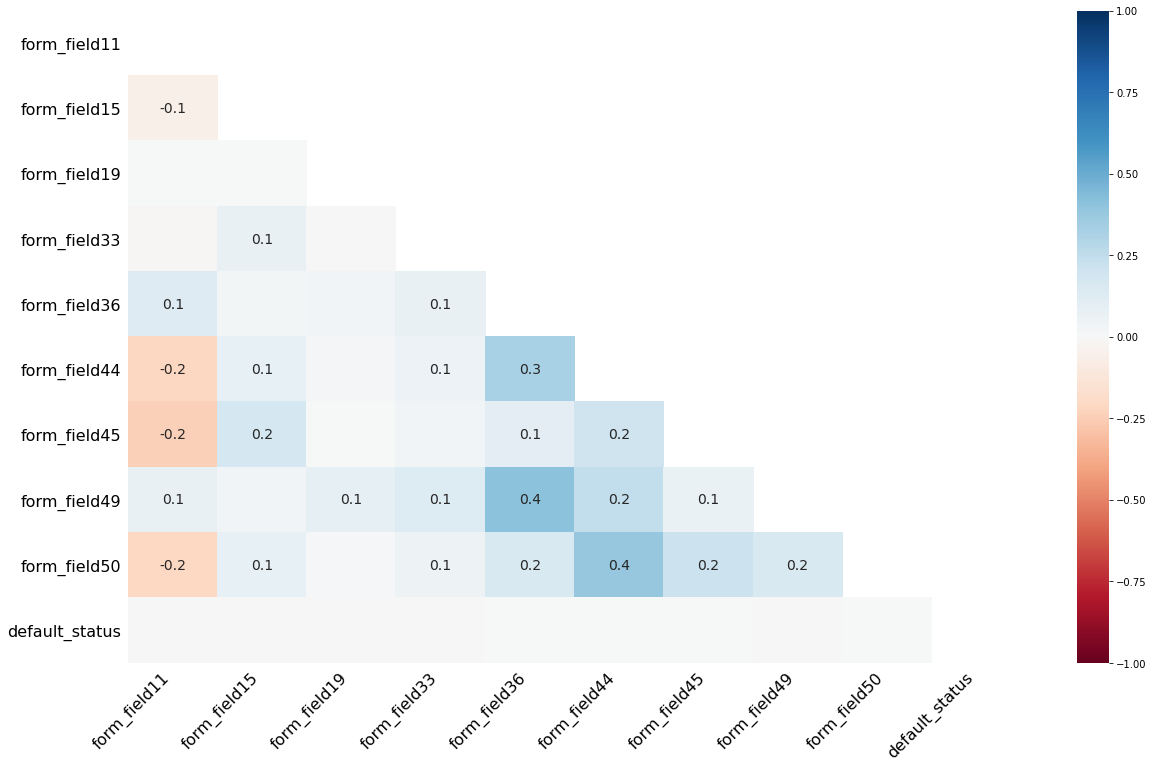

In [ ]:
missingno.heatmap(combined)
# there is no correlation between na values  hence filling 0

In [ ]:
combined.fillna(0.0,inplace=True)

In [ ]:
combined.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [ ]:
combined['TotalSeverity'] = combined['form_field3'] + combined['form_field4'] + combined['form_field5']

In [ ]:
combined['MonthlyAmountPaid'] = combined['form_field13'] / 12
combined['MonthlyIncome'] = combined['form_field14'] / 12

In [ ]:
combined['number_credit_card_with_partial_credit_limit'] = combined['form_field19'] - combined['form_field17']
combined['number_credit_lines_with_partial_credit_limit'] = combined['form_field20'] - combined['form_field18']

In [ ]:
combined['active_non_renewed_cc_with_full_utilization'] = combined['form_field17'] - combined['form_field16']

In [ ]:
combined['tenure_cc_years'] = combined['form_field25'] / 365
combined['tenure_old_cc_years'] = combined['form_field26'] / 365
combined['tenure_old_cc_revolving_years'] = combined['form_field27'] / 365

In [ ]:
form_field47 = {"charge":0,"lending":1}

combined['form_field47'] = combined['form_field47'].map(form_field47)

# Handling NAN values

In [ ]:
# form47 = {"charge":0,"lending":1}
# combined['form_field47'] = combined['form_field47'].map(form47)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [ ]:
# imputer = IterativeImputer()
# impute_data = pd.DataFrame(imputer.fit_transform(combined.drop(['Applicant_ID','default_status','is_train'],axis=1)))

In [ ]:
# impute_data.columns = combined.drop(['Applicant_ID','default_status','is_train'],axis=1).columns

In [ ]:
# combined = combined[['Applicant_ID','default_status','is_train']].reset_index().merge(impute_data.reset_index(),how="left",on='index').drop("index",axis=1)

# EDA

## Risk scoring features

In [ ]:
combined['form_field1'].describe()

count    76361.000000
mean      3491.942169
std        189.075233
min       2986.000000
25%       3358.000000
50%       3484.000000
75%       3620.000000
max       3900.000000
Name: form_field1, dtype: float64

In [ ]:
combined['form_field2'].describe()

count    74447.000000
mean         0.552815
std          0.822650
min          0.000000
25%          0.070050
50%          0.269450
75%          0.722525
max         22.315050
Name: form_field2, dtype: float64

In [ ]:
combined['form_field1'].fillna(-999,inplace=True)
combined['form_field2'].fillna(-999,inplace=True)
## The score is filled 0 because the credit worthiness score may not be present for the applicant also

In [ ]:
# combined['form_field1'] = formfield12[:,0]
# combined['form_field2'] = formfield12[:,1]

## Severity features

In [ ]:
combined[['form_field3','form_field4','form_field5']].describe()

,form_field3,form_field4,form_field5
count,79499.000000,79499.000000,79499.000000
mean,1.056191,0.854130,2.024495
std,2.163093,3.233269,10.791811
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.060000,0.000000,0.000000
75%,1.289400,0.000000,0.000000
max,57.371600,206.452800,407.748600


In [ ]:
combined[['form_field3','form_field4','form_field5','form_field11','form_field28','form_field39']]

,form_field3,form_field4,form_field5,form_field11,form_field28,form_field39
0,1.6560,0.0000,0.0000,4397256.0,60.0,0.0
1,0.2342,0.0000,0.0000,244292.0,304.0,0.0
2,3.1510,0.0000,6.2820,NaN,60.0,0.0
3,0.5050,0.0000,0.0000,NaN,60.0,1.0
4,1.1010,0.0000,0.0000,396391.0,60.0,0.0
...,...,...,...,...,...,...
23995,0.5698,5.1282,0.0000,1743887.0,304.0,0.0
23996,0.0000,0.0000,0.0000,NaN,60772.0,0.0
23997,4.2394,0.0000,25.4376,215895.0,60.0,0.0
23998,1.4428,0.0000,0.0000,121757.0,0.0,0.0


In [ ]:
combined['form_field3'].fillna(-999,inplace=True)
combined['form_field4'].fillna(-999,inplace=True)
combined['form_field5'].fillna(-999,inplace=True)

In [ ]:
combined['TotalSeverity'] = combined['form_field3'] + combined['form_field4'] + combined['form_field5']

In [ ]:
# combined['TotalSeverity'] = ms.fit_transform(combined['TotalSeverity'].values.reshape(-1,1))
# combined['form_field3'] = ms.fit_transform(combined['form_field3'].values.reshape(-1,1))
# combined['form_field4'] = ms.fit_transform(combined['form_field4'].values.reshape(-1,1))
# combined['form_field5'] = ms.fit_transform(combined['form_field5'].values.reshape(-1,1))

## Credit features

In [ ]:
credit_features = ['form_field6','form_field7','form_field8','form_field9','form_field11','form_field12','form_field15']
for credit in credit_features:
  combined[credit].fillna(-999,inplace=True)
# Filling credit features to 0.0 as they have more number of null values and it is also good to fill 0 for amount oriented columns

In [ ]:
combined['form_field10'].fillna(-999,inplace=True)

In [ ]:
combined['form_field13'].fillna(-999,inplace=True)

In [ ]:
credit_features = ['form_field6','form_field7','form_field8','form_field9','form_field10',
                   'form_field11','form_field12','form_field13','form_field14',
                   'form_field15']

In [ ]:
combined['form_field14'].describe()

count    8.000000e+04
mean     7.627971e+07
std      3.068579e+09
min      0.000000e+00
25%      1.657646e+07
50%      2.814143e+07
75%      4.818738e+07
max      3.854990e+11
Name: form_field14, dtype: float64

In [ ]:
combined[credit_features]

,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15
0,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0
1,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0
2,-999.0,956940.0,-999.0,192944.0,1079864.0,-999.0,-999.0,0.0,16576457,22452691.0
3,192166.0,3044703.0,385499.0,3986472.0,3621979.0,-999.0,771776.0,1186839.0,48187375,136297820.0
4,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0
...,...,...,...,...,...,...,...,...,...,...
23995,-999.0,2280318.0,-999.0,-999.0,2280318.0,1743887.0,-999.0,0.0,21973443,126128971.0
23996,1494538.0,4773419.0,4773419.0,89718571.0,12999991.0,-999.0,48989882.0,97696961.0,96375139,-999.0
23997,-999.0,49403.0,-999.0,-999.0,49403.0,215895.0,-999.0,0.0,21973443,-999.0
23998,0.0,2513329.0,37733.0,393668.0,2551062.0,121757.0,355935.0,673748.0,16576457,-999.0


In [ ]:
combined['MonthlyAmountPaid'] = combined['form_field13'] / 12
combined['MonthlyIncome'] = combined['form_field14'] / 12

## Credit card features

In [ ]:
credit_card_line = ["form_field16","form_field17","form_field18"]
for credit_card in credit_card_line:
  combined[credit_card].fillna(-999,inplace=True)

In [ ]:
# utilization_75 = ["form_field19","form_field20"]
# These fields are filled with 17 and 18 for na because, 100% utilitization can be lesser or equal to it. logically!!
combined['form_field19'].fillna(combined['form_field17'],inplace=True)
combined['form_field20'].fillna(combined['form_field18'],inplace=True)

In [ ]:
combined['number_credit_card_with_partial_credit_limit'] = combined['form_field19'] - combined['form_field17']
combined['number_credit_lines_with_partial_credit_limit'] = combined['form_field20'] - combined['form_field18']

In [ ]:
combined['active_non_renewed_cc_with_full_utilization'] = combined['form_field17'] - combined['form_field16']

In [ ]:
combined['number_credit_card_with_partial_credit_limit'].describe()

count    80000.000000
mean       198.559088
std        397.763553
min         -7.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1006.000000
Name: number_credit_card_with_partial_credit_limit, dtype: float64

In [ ]:
combined['number_credit_lines_with_partial_credit_limit'].describe()

count    80000.000000
mean       178.984138
std        382.078258
min         -7.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1006.000000
Name: number_credit_lines_with_partial_credit_limit, dtype: float64

In [ ]:
## How come atleast 75% utilization - max utilization results in negative value? anomaly in the dataset

In [ ]:
combined['active_non_renewed_cc_with_full_utilization'].describe()

count    80000.000000
mean        33.302237
std        179.250790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1002.000000
Name: active_non_renewed_cc_with_full_utilization, dtype: float64

In [ ]:
utilization_tenure = ['form_field21','form_field22','form_field23','form_field24','form_field25','form_field26','form_field27']
for utilization in utilization_tenure:
  combined[utilization].fillna(-999,inplace=True)

In [ ]:
combined['tenure_cc_years'] = combined['form_field25'] / 365
combined['tenure_old_cc_years'] = combined['form_field26'] / 365
combined['tenure_old_cc_revolving_years'] = combined['form_field27'] / 365

## Timed Features

In [ ]:
timed = []
for i in range(28,42):
  timed.append("form_field{}".format(i))

In [ ]:
for time in timed:
  combined[time].fillna(-999,inplace=True)

In [ ]:
combined[timed].isnull().sum()

form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
dtype: int64

## Other features

In [ ]:
other = []
for i in range(42,51):
  other.append("form_field{}".format(i))
combined[other].isnull().sum()

form_field42     1901
form_field43      818
form_field44     7745
form_field45    44855
form_field46    22789
form_field47        0
form_field48    29811
form_field49      501
form_field50    15853
dtype: int64

In [ ]:
form_field47 = {"charge":0,"lending":1}

combined['form_field47'] = combined['form_field47'].map(form_field47)

In [ ]:
for others in other:
  combined[others].fillna(-999,inplace=True)

In [ ]:
combined.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,is_train,TotalSeverity,MonthlyAmountPaid,MonthlyIncome,number_credit_card_with_partial_credit_limit,number_credit_lines_with_partial_credit_limit,active_non_renewed_cc_with_full_utilization,tenure_cc_years,tenure_old_cc_years,tenure_old_cc_revolving_years
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-999.00,-999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-999.0,1052.0,8.0000,2.0,-999.0,12.0,12.0,4.0,0.0,-999.0000,-999.0,0.392854,2.02,0.711632,0.0,0.0,0,-999.000000,1.129518,0.044335,no,1,1.6560,656307.833333,8.031262e+06,2.0,2.0,0.0,10.960274,46.750685,31.167123
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-999.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,-999.0000,-999.0,0.314281,8.08,0.183584,-999.0,0.0,0,349.805730,1.620483,0.322436,no,1,0.2342,178453.750000,2.345119e+06,1.0,1.0,0.0,11.400000,36.747945,24.498630
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,-999.0,-999.0,0.0,16576457,22452691.0,-999.0,-999.0,-999.0,0.0,0.0,-999.000,-999.00,-999.00,-999.000,1597.5,4746.0,3164.0,60.0,15696.0,-999.0,14508.0,70.0,0.6666,0.0,-999.0,12.0,0.0,6.0,0.0,149.6805,-999.0,0.162965,18.18,0.791136,0.0,0.0,0,-999.000000,1.513370,0.011640,yes,1,9.4330,0.000000,1.381371e+06,999.0,999.0,0.0,4.376712,13.002740,8.668493
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,-999.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,-999.0,-999.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,-999.0000,-999.0,0.488884,2.02,0.685168,-999.0,0.0,0,89.940100,0.664452,0.082729,no,1,0.5050,98903.250000,4.015615e+06,1.0,1.0,0.0,4.660274,10.997260,7.331507
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,-999.0,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,no,1,1.1010,42627.916667,2.345119e+06,3.0,3.0,0.0,4.249315,9.000000,6.000000


# Feature Engineering

In [ ]:
combined['is_education'] = 0
combined['is_auto'] = 0


In [ ]:
combined.loc[combined['form_field40'] != 0.0,'is_education'] = 1
combined.loc[combined['form_field41'] != 0.0,'is_auto'] = 1

In [ ]:
combined['max_minus_min_68'] = combined['form_field8'] - combined['form_field6']

In [ ]:
combined['amount_paid_per_income'] = combined['form_field13'] / combined['form_field14']
combined['amount_paid_per_income'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['cc_due_proportion_annual_income'] = combined['form_field12'] / combined['form_field14']
combined['cc_due_proportion_annual_income'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['cl_amount_per_income'] = combined['form_field10'] / combined['form_field14']
combined['cl_amount_per_income'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['total_value'] = combined['form_field15'] + combined['form_field14']

In [ ]:
combined['form6_by_16'] = combined['form_field6'] / combined['form_field16']
combined['form6_by_16'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['form8_by_16'] = combined['form_field8'] / combined['form_field16']
combined['form8_by_16'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['form10_by_36'] = combined['form_field10'] / combined['form_field36']
combined['form10_by_36'].replace(np.inf, -999, inplace=True)

In [ ]:
combined['form_field42'].describe()

count    80000.000000
mean       -23.378842
std        152.213723
min       -999.000000
25%          0.000000
50%          0.206250
75%          0.611116
max          2.200000
Name: form_field42, dtype: float64

In [ ]:
combined[['form_field48','form_field49']].describe()

,form_field48,form_field49
count,8.000000e+04,80000.000000
mean,1.904294e+05,-5.209257
std,1.367996e+06,78.913111
min,-9.990000e+02,-999.000000
25%,-9.990000e+02,0.000000
50%,5.139381e+01,0.000000
75%,5.135220e+02,1.173988
max,1.213991e+08,28.000000


In [ ]:
combined['income_assets'] = combined['form_field14'] + combined['form_field15']

## Grouped features

In [ ]:
combined['form1614_mean'] = combined.groupby(combined['form_field16'])['form_field14'].mean()
combined['form1714_mean'] = combined.groupby(combined['form_field17'])['form_field14'].mean()
combined['form1814_mean'] = combined.groupby(combined['form_field18'])['form_field14'].mean()
combined['form1914_mean'] = combined.groupby(combined['form_field19'])['form_field14'].mean()
combined['form2014_mean'] = combined.groupby(combined['form_field20'])['form_field14'].mean()
combined['form2614_mean'] = combined.groupby(combined['form_field26'])['form_field14'].mean()
combined['form2714_mean'] = combined.groupby(combined['form_field27'])['form_field14'].mean()
combined['form4514_mean'] = combined.groupby(combined['form_field45'])['form_field14'].mean()
combined['form4614_mean'] = combined.groupby(combined['form_field46'])['form_field14'].mean()
combined['form4714_mean'] = combined.groupby(combined['form_field47'])['form_field14'].mean()


combined['form1615_mean'] = combined.groupby(combined['form_field16'])['form_field15'].mean()
combined['form1715_mean'] = combined.groupby(combined['form_field17'])['form_field15'].mean()
combined['form1815_mean'] = combined.groupby(combined['form_field18'])['form_field15'].mean()
combined['form1915_mean'] = combined.groupby(combined['form_field19'])['form_field15'].mean()
combined['form2015_mean'] = combined.groupby(combined['form_field20'])['form_field15'].mean()
combined['form2615_mean'] = combined.groupby(combined['form_field26'])['form_field15'].mean()
combined['form2715_mean'] = combined.groupby(combined['form_field27'])['form_field15'].mean()
combined['form4515_mean'] = combined.groupby(combined['form_field45'])['form_field15'].mean()
combined['form4615_mean'] = combined.groupby(combined['form_field46'])['form_field15'].mean()
combined['form4715_mean'] = combined.groupby(combined['form_field47'])['form_field15'].mean()

# Model

## Helpful method for accuracy detection

In [ ]:
def print_score(m):
  all_metrics = [m.score(X_train,y_train),m.score(X_test,y_test), m.score(X_valid, y_valid)]
  if hasattr(m,"oob_score"):
    all_metrics.append(m.oob_score)
  return all_metrics 


def evaluate_model(y_true, y_pred):
    print('confusion matrix')
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm.T)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)
    print('classification report')
    print(classification_report(y_true,y_pred))
    print('accuracy score')
    print(accuracy_score(y_true, y_pred))

## Splitting into train and test

In [ ]:
combined.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status',
       'is_train', 'TotalSeverity', 'MonthlyAmountPaid', 'MonthlyIncome',
       'nu

In [ ]:
combined.drop(['form_field48','form_field49'],axis=1,inplace=True)

In [ ]:
train1 = combined[combined['is_train'] == 1]
test1 = combined[combined['is_train'] == 0]

In [ ]:
train1.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50,default_status,is_train,TotalSeverity,MonthlyAmountPaid,MonthlyIncome,number_credit_card_with_partial_credit_limit,number_credit_lines_with_partial_credit_limit,active_non_renewed_cc_with_full_utilization,tenure_cc_years,tenure_old_cc_years,tenure_old_cc_revolving_years,is_education,is_auto,max_minus_min_68,amount_paid_per_income,cc_due_proportion_annual_income,cl_amount_per_income,total_value,form6_by_16,form8_by_16,form10_by_36,income_assets
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-999.00,-999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-999.0,1052.0,8.0000,2.0,-999.0,12.0,12.0,4.0,0.0,-999.0000,-999.0,0.392854,2.02,0.711632,0.0,0.0,0,0.044335,no,1,1.6560,656307.833333,8.031262e+06,2.0,2.0,0.0,10.960274,46.750685,31.167123,1,1,252072.0,0.081719,0.023879,0.117594,208556904.0,0.0,252072.0,944427.166667,208556904.0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-999.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,-999.0000,-999.0,0.314281,8.08,0.183584,-999.0,0.0,0,0.322436,no,1,0.2342,178453.750000,2.345119e+06,1.0,1.0,0.0,11.400000,36.747945,24.498630,1,1,497531.0,0.076096,0.141534,0.090016,73311329.0,0.0,497531.0,158323.000000,73311329.0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,-999.0,-999.0,0.0,16576457,22452691.0,-999.0,-999.0,-999.0,0.0,0.0,-999.000,-999.00,-999.00,-999.000,1597.5,4746.0,3164.0,60.0,15696.0,-999.0,14508.0,70.0,0.6666,0.0,-999.0,12.0,0.0,6.0,0.0,149.6805,-999.0,0.162965,18.18,0.791136,0.0,0.0,0,0.011640,yes,1,9.4330,0.000000,1.381371e+06,999.0,999.0,0.0,4.376712,13.002740,8.668493,1,1,0.0,0.000000,-0.000060,0.065144,39029148.0,1.0,1.0,89988.666667,39029148.0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,-999.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,-999.0,-999.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,-999.0000,-999.0,0.488884,2.02,0.685168,-999.0,0.0,0,0.082729,no,1,0.5050,98903.250000,4.015615e+06,1.0,1.0,0.0,4.660274,10.997260,7.331507,1,1,193333.0,0.024630,0.016016,0.075164,184485195.0,-999.0,-999.0,905494.750000,184485195.0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,-999.0,0.275000,12.12,0.438168,0.0,0.0,0,0.045630,no,1,1.1010,42627.916667,2.345119e+06,3.0,3.0,0.0,4.249315,9.000000,6.000000,1,1,213172.0,0.018177,0.029084,0.012855,43434184.0,-999.0,-999.0,15073.750000,43434184.0


## Split into X and y

## Split

In [ ]:
train1 = train1.drop(['is_train'],axis=1)
test1 = test1.drop(['is_train'],axis=1)

In [ ]:
train1.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50,TotalSeverity,MonthlyAmountPaid,MonthlyIncome,number_credit_card_with_partial_credit_limit,number_credit_lines_with_partial_credit_limit,active_non_renewed_cc_with_full_utilization,tenure_cc_years,tenure_old_cc_years,tenure_old_cc_revolving_years,is_education,is_auto,max_minus_min_68,amount_paid_per_income,cc_due_proportion_annual_income,cl_amount_per_income,total_value,form6_by_16,form8_by_16,form10_by_36,income_assets
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,56000.000000,5.600000e+04,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.0,56000.000000,5.600000e+04,5.580400e+04,5.589900e+04,5.587600e+04,5.600000e+04,55553.0,55939.0,5.600000e+04,5.600000e+04
mean,3288.988125,-68.061282,-5.287392,-5.486368,-4.389031,4.752342e+05,6.232170e+06,1.999799e+06,1.127799e+07,1.178069e+07,9.012758e+05,2.281290e+06,5.377829e+06,6.914875e+07,6.854873e+07,-232.376143,-198.713089,-185.342911,0.877375,-5.307893,-220.812531,3849.793985,2710.570025,-157.477512,2271.906295,8631.499232,4996.671982,17158.475375,16407.492000,2383.457375,2513.931054,749.800107,-8.791913,-6.104161,-412.826536,-23.188411,-89.569000,2.213946,-75.037214,-747.707893,-647.668167,-23.241859,-3.565496,-95.519653,-558.640946,-283.647714,0.350482,4.818161e+05,-15.162791,4.481524e+05,5.762396e+06,199.590464,180.035018,33.663054,6.224401,23.647943,13.689512,1.0,0.999268,1.524564e+06,-inf,-inf,-inf,1.376975e+08,-inf,-inf,1.470230e+06,1.376975e+08
std,950.560828,252.735737,79.400587,79.418227,80.131613,1.278889e+06,1.833216e+07,3.605357e+06,1.888158e+07,2.662648e+07,3.410960e+06,4.257190e+06,2.217339e+07,2.713995e+09,1.054537e+08,422.285716,399.053095,388.625626,8.627427,79.390025,491.120212,5817.699466,5503.049115,604.910786,2153.183593,9016.988065,5603.041057,26884.391711,9735.285958,3858.394906,6336.743816,1146.612131,150.740001,79.309402,492.046373,187.842975,298.746289,80.364466,263.470948,474.850472,515.718136,151.783727,100.964839,294.636580,496.023149,450.532984,0.477125,5.239461e+06,238.517363,1.847782e+06,2.261663e+08,398.538824,382.954499,180.186414,5.899133,24.704077,15.350797,0.0,0.027048,3.133628e+06,NaN,NaN,NaN,2.715782e+09,NaN,NaN,4.333956e+06,2.715782e+09
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-9.990000e

## Standard scaler 

In [ ]:
train1.replace(np.inf,-999,inplace=True)
train1.replace(-np.inf,-999, inplace=True)
test1.replace(np.inf,-999, inplace=True)
test1.replace(-np.inf,-999,inplace=True)

In [ ]:
train1.replace(np.nan,-999,inplace=True)
test1.replace(np.nan,-999,inplace=True)

In [ ]:
train1.loc[:,'kfold'] = -1
train1 = train1.sample(frac=1).reset_index(drop=True)
skf = StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(skf.split(X = train1.drop("default_status",axis=1), y = train1['default_status'])):
  train1.loc[v_, 'kfold'] = f

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = train1.drop(["form_field47",'Applicant_ID','kfold','default_status','is_auto','is_education'],axis=1)
X_test_ = test1.drop(["form_field47",'default_status','Applicant_ID','is_auto','is_education'],axis=1)

from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kbins.fit(X_.values)
X_kbin = kbins.transform(X_.values)
X_test_kbin = kbins.transform(X_test_.values)


sc.fit(X_.values)
X_sc = sc.transform(X_.values)
X_test_sc = sc.transform(X_test_.values)

In [ ]:
X_sc = np.hstack((X_sc,train1[['form_field47','Applicant_ID','kfold','default_status','is_auto','is_education']].values))

In [ ]:
X_columns = list(X_.columns)
X_columns.append("form_field47")
X_columns.append("Applicant_ID")
X_columns.append('kfold')
X_columns.append("default_status")
X_columns.append("is_auto")
X_columns.append("is_education")
X_sc = pd.DataFrame(X_sc, columns=X_columns)

In [ ]:
X_test_sc = np.column_stack((X_test_sc, test1[['form_field47','Applicant_ID','is_auto','is_education']]))

In [ ]:
X_test_columns = list(X_test_.columns)
X_test_columns.append("form_field47")
X_test_columns.append("Applicant_ID")
X_test_columns.append("is_auto")
X_test_columns.append("is_education")
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_columns)

In [ ]:
X_kbin.shape

(56000, 65)

In [ ]:
X_test_kbin.shape

(24000, 65)

In [ ]:
column_name = []
for i in range(65):
  column_name.append("column{}".format(i))

In [ ]:
X_kbin = pd.DataFrame(X_kbin,columns=column_name).reset_index()
X_test_kbin = pd.DataFrame(X_test_kbin, columns=column_name).reset_index()

In [ ]:
X_sc = X_sc.reset_index().merge(X_kbin,how="left",on='index').drop("index",axis=1)
X_test_sc = X_test_sc.reset_index().merge(X_test_kbin,how="left",on='index').drop("index",axis=1)

In [ ]:
X_sc.replace(np.inf,-999,inplace=True)
X_sc.replace(-np.inf,-999,inplace=True)
X_test_sc.replace(np.inf,-999,inplace=True)
X_test_sc.replace(-np.inf,-999,inplace=True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_sc.replace(np.nan,-999,inplace=True)
X_test_sc.replace(np.nan, -999, inplace=True)

In [ ]:
cluster = X_sc.drop(['Applicant_ID','kfold','default_status'],axis=1).copy()
kmeanModel = KMeans(n_clusters=7)
preds = kmeanModel.fit_predict(cluster)
X_sc['customer_seg'] = preds

cluster = X_test_sc.drop(['Applicant_ID'],axis=1).copy()
kmeanModel = KMeans(n_clusters=7)
preds = kmeanModel.fit_predict(cluster)
X_test_sc['customer_seg'] = preds

In [ ]:
X_sc.shape

(56000, 137)

In [ ]:
from sklearn import metrics

In [ ]:
import xgboost as xgb

## Actual modelling

In [ ]:
!pip install --upgrade git+https://github.com/stanfordmlgroup/ngboost.git
import ngboost

  Cloning https://github.com/stanfordmlgroup/ngboost.git to /tmp/pip-req-build-igpgsyca
  Running command git clone -q https://github.com/stanfordmlgroup/ngboost.git /tmp/pip-req-build-igpgsyca
  Created wheel for ngboost: filename=ngboost-0.3.7.dev0-cp36-none-any.whl size=40044 sha256=f9fea042514a61a3945baf908109423d8e0b8bc70105f89c6f1f554aa5da886a
  Stored in directory: /tmp/pip-ephem-wheel-cache-li6f01v5/wheels/6d/38/b0/7dc3b6546bf28b1cc407b44f75cbecf072fc2bae32e8f6a835
Successfully built ngboost
  Found existing installation: ngboost 0.3.7.dev0
    Uninstalling ngboost-0.3.7.dev0:
      Successfully uninstalled ngboost-0.3.7.dev0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

### Dealing with outliers

In [ ]:
def remove_outliers(x):
  print("in remove")
  Q1 = x[x.columns.drop(list(x.filter(regex='column')))].quantile(0.25)
  Q3 = x[x.columns.drop(list(x.filter(regex='column')))].quantile(0.75)
  IQR = Q3 - Q1
  x = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
  return x

### Feature selection

In [ ]:
!pip install boruta

In [ ]:
from boruta import BorutaPy

In [ ]:
def boruta_selection(model,X_boruta,X_test_boruta):
  # Return only accepted columns
  feat_selector = BorutaPy(model, n_estimators=10, verbose=2, random_state=1)
  feat_selector.fit(X_boruta.drop(['Applicant_ID','default_status'],axis=1), X_boruta['default_status'])
  accept = X_boruta.columns[feat_selector.support_].to_list()
  print(accept)
  X_selected = X_boruta[accept]
  X_selected['Applicant_ID'] = X_boruta['Applicant_ID']
  X_test_selected = X_test_boruta[X_selected.columns]
  X_selected['default_status'] = X_boruta['default_status']
  X_selected = remove_outliers(X_selected)
  return X_selected, X_test_selected

# def boruta_selection_boosting(X_boruta, y_boruta):
#   # Return only accepted columns
#   model = RandomForestClassifier(n_estimators=100)
#   feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)
#   feat_selector.fit(X_boruta.values, y_boruta.values)
#   accept = X_boruta.columns[feat_selector.support_].to_list()
#   print(accept)
#   return accept

#### We are going to build a model with only selected features for each model

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
def select_features(model,X_sc):
  sel = SelectFromModel(model)
  sel.fit(X_sc.drop(["default_status",'Applicant_ID','kfold'],axis=1),X_sc['default_status'])
  selected_feat= X_sc.drop(['Applicant_ID','default_status','kfold'],axis=1).columns[(sel.get_support())]
  rf_x = X_sc[selected_feat]
  rf_x['default_status'] = X_sc['default_status']
  rf_x['kfold'] = X_sc['kfold']
  return rf_x

In [ ]:
default_status = {"yes":1,"no":0}
X_sc['default_status'] = X_sc['default_status'].map(default_status)

In [ ]:
# ## Random forest
rf_model = RandomForestClassifier(n_estimators = 100)
rf_x = select_features(rf_model,X_sc)

## ET
et_model = ExtraTreesClassifier(n_estimators = 100)
et_x = select_features(et_model,X_sc)

#lgbm
lg_model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced')
lg_x = select_features(lg_model,X_sc)

## catboost
best_params = {'bagging_temperature': 0.8,
               'depth': 3,
               'n_estimators': 2863,
               'l2_leaf_reg': 26,
               'learning_rate': 0.013323731791098763,
               'random_strength': 2.415935763457928e-08,
               'scale_pos_weight':2.414,
               'border_count':225}
cat_model = CatBoostClassifier(**best_params,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          nan_mode='Min',
                          thread_count=4, task_type='GPU')

cat_x = select_features(cat_model,X_sc)


# xgb
xg_model = xgb.XGBClassifier(n_estimators=100, scale_pos_weight=2.414)
xg_x = select_features(xg_model,X_sc)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

0:	learn: 0.7670719	total: 13.5ms	remaining: 38.6s
1:	learn: 0.7686143	total: 26.1ms	remaining: 37.3s
2:	learn: 0.7687745	total: 38.1ms	remaining: 36.3s
3:	learn: 0.7717383	total: 50.1ms	remaining: 35.8s
4:	learn: 0.7717104	total: 62.2ms	remaining: 35.5s
5:	learn: 0.7717295	total: 74.3ms	remaining: 35.4s
6:	learn: 0.7852209	total: 86.7ms	remaining: 35.4s
7:	learn: 0.7857703	total: 99ms	remaining: 35.3s
8:	learn: 0.7860065	total: 111ms	remaining: 35.2s
9:	learn: 0.7865433	total: 123ms	remaining: 35.1s
10:	learn: 0.7868568	total: 135ms	remaining: 35.1s
11:	learn: 0.7961177	total: 148ms	remaining: 35.1s
12:	learn: 0.7970979	total: 160ms	remaining: 35s
13:	learn: 0.7971031	total: 172ms	remaining: 34.9s
14:	learn: 0.7970132	total: 184ms	remaining: 34.9s
15:	learn: 0.7973149	total: 196ms	remaining: 34.8s
16:	learn: 0.7989913	total: 208ms	remaining: 34.8s
17:	learn: 0.7995382	total: 225ms	remaining: 35.6s
18:	learn: 0.7999914	total: 237ms	remaining: 35.5s
19:	learn: 0.8009245	total: 260ms	rem

In [ ]:
# ngboost
ng_model = ngboost.NGBClassifier(n_estimators=100)
ng_model.fit(X_sc.drop(["Applicant_ID",'default_status'],axis=1),X_sc['default_status'])
#ng_x = select_features(ng_model,X_sc)

[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000


NGBClassifier(Base=DecisionTreeRegressor(ccp_alpha=0.0,
                                         criterion='friedman_mse', max_depth=3,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort='deprecated',
                                         random_state=None, splitter='best'),
              Dist=<class 'ngboost.distns.categorical.k_categorical.<locals>.Categorical'>,
              Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
              learning_rate=0.01, minibatch_frac=1.0, n_estimators=100,
              natural_gradient=True,
              random_state=RandomState(MT1

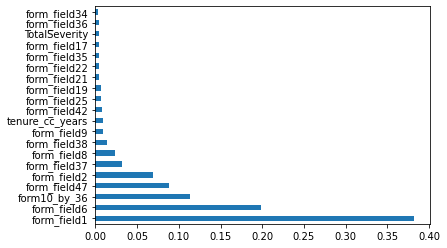

In [ ]:
feat_importances = pd.Series(ng_model.feature_importances_[0], index=X_sc.drop(["Applicant_ID",'default_status'],axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
ngboost_cols = feat_importances.nlargest(40).index
ng_x = X_sc[ngboost_cols]
ng_x['default_status'] = X_sc['default_status']
ng_x['kfold'] = X_sc['kfold']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
rf_x['Applicant_ID'] = train1['Applicant_ID']
et_x['Applicant_ID'] = train1['Applicant_ID']
lg_x['Applicant_ID'] = train1['Applicant_ID']
xg_x['Applicant_ID'] = train1['Applicant_ID']
ng_x['Applicant_ID'] = train1['Applicant_ID']
cat_x['Applicant_ID'] = train1['Applicant_ID']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Models in kfold

In [ ]:
default_status = {"yes":1,"no":0}
X_sc['default_status'] = X_sc['default_status'].map(default_status)

In [ ]:
def run_training_ngb(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xtest = df_test.drop(['Applicant_ID'],axis=1)

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  model = ngboost.NGBClassifier(n_estimators=100)

  model.fit(xtrain, ytrain)

  xtest = xtest[xtrain.columns].values

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')

  valid_df.loc[:,"ngb_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','ngb_pred']], y_test_pred

def run_training_et(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xtest = df_test.drop(['Applicant_ID'],axis=1)   #.values was there

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  model = ExtraTreesClassifier(n_estimators=100) #class_weight='balanced')

  # feature selection
  xtest = xtest[xtrain.columns].values

  model.fit(xtrain, ytrain)

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')

  valid_df.loc[:,"et_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','et_pred']], y_test_pred

def run_training_rf(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xtest = df_test.drop(['Applicant_ID'],axis=1) #it was .values

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  model = RandomForestClassifier(n_estimators=100) #, class_weight='balanced')

  
  xtest = xtest[xtrain.columns].values

  #set optimal parameters
  #model.set_params(**opt_parameters)
  #model = lgb.LGBMClassifier(n_estimators=500)
  model.fit(xtrain, ytrain)

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')

  valid_df.loc[:,"rf_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','rf_pred']], y_test_pred

def run_training_lgbm(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xtest = df_test.drop(['Applicant_ID'],axis=1)

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  opt_params = {'colsample_bytree': 0.5645098230355559, 'min_child_samples': 250, 'min_child_weight': 100.0, 'num_leaves': 12,
                'reg_alpha': 0, 'reg_lambda': 100, 'subsample': 0.8265673984661308}
  model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced')
  #set optimal parameters
  #model.set_params(**opt_parameters)
  #model = lgb.LGBMClassifier(n_estimators=500)

  xtest = xtest[xtrain.columns].values
  
  model.fit(xtrain, ytrain)

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')

  valid_df.loc[:,"lgb_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','lgb_pred']], y_test_pred


def run_training_cat(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1)
  xtest = df_test.drop(['Applicant_ID'],axis=1)

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  best_params = {'bagging_temperature': 0.8,
               'depth': 3,
               'n_estimators': 2863,
               'l2_leaf_reg': 26,
               'learning_rate': 0.013323731791098763,
               'random_strength': 2.415935763457928e-08,
               'scale_pos_weight':2.414,
               'border_count':225}
  
  model = CatBoostClassifier(**best_params,
                           loss_function='Logloss',
                           eval_metric='AUC',
                           nan_mode='Min',
                           thread_count=4, task_type='GPU',
                           verbose=False)

  # feature selection
  xtest = xtest[xtrain.columns].values
  
  model.fit(xtrain, ytrain)

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')

  valid_df.loc[:,"catboost_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','catboost_pred']], y_test_pred

def run_training_xgb(df, df_test, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)
  df_test = df_test[train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1).columns]
  xtrain = train_df.drop(["kfold",'Applicant_ID','default_status'],axis=1).values
  xvalid = valid_df.drop(["kfold",'Applicant_ID','default_status'],axis=1).values
  xtest = df_test.values

  ytrain = train_df['default_status']
  yvalid = valid_df['default_status']
  
  model = xgb.XGBClassifier(n_estimators=100, scale_pos_weight=2.414)

  model.fit(xtrain, ytrain)

  y_pred = model.predict_proba(xvalid)[:,1]
  print(f'{fold} : {metrics.roc_auc_score(yvalid, y_pred)}')
  print(xvalid.shape)
  print(xtest.shape)
  valid_df.loc[:,"xgboost_pred"] = y_pred
  y_test_pred = model.predict_proba(xtest)[:,1]

  return valid_df[['Applicant_ID','default_status','kfold','xgboost_pred']], y_test_pred

In [ ]:
df_list1 = []
for fold in range(5):
  column_name = "lgb_pred{}".format(fold)
  df1, submission[column_name]  = run_training_lgbm(X_sc, X_test_sc, fold)
  df_list1.append(df1)
df_lgb = pd.concat(df_list1)

df_list2 = []
for fold in range(5):
  column_name = "cat_pred{}".format(fold)
  df2, submission[column_name] = run_training_cat(X_sc, X_test_sc, fold)
  df_list2.append(df2)
df_cat = pd.concat(df_list2)

df_list3 = []
for fold in range(5):
  column_name = "xgb_pred{}".format(fold)
  df3, submission[column_name] = run_training_xgb(X_sc, X_test_sc, fold)
  df_list3.append(df3)
df_xgb = pd.concat(df_list3)

df_list4 = []
for fold in range(5):
  column_name = "rf_pred{}".format(fold)
  df4, submission[column_name] = run_training_rf(X_sc, X_test_sc, fold)
  df_list4.append(df4)
df_rf = pd.concat(df_list4)

df_list5 = []
for fold in range(5):
  column_name = "ngb_pred{}".format(fold)
  df5, submission[column_name] = run_training_ngb(X_sc, X_test_sc, fold)
  df_list5.append(df5)
df_ngb = pd.concat(df_list5)

df_list6 = []
for fold in range(5):
  column_name = "et_pred{}".format(fold)
  df6, submission[column_name] = run_training_et(X_sc, X_test_sc, fold)
  df_list6.append(df6)
df_et = pd.concat(df_list6)

0 : 0.8451352472508845
1 : 0.8361687403985016
2 : 0.8354061167922424
3 : 0.8320163624168775
4 : 0.8375165550880781
0 : 0.8467853783358424
1 : 0.8404215384632628
2 : 0.8375379797634672
3 : 0.8330954849501139
4 : 0.8393070458170347
0 : 0.8429100554623203
(11200, 134)
(24000, 134)
1 : 0.8364398897107717
(11200, 134)
(24000, 134)
2 : 0.8331576466843416
(11200, 134)
(24000, 134)
3 : 0.8289830034213527
(11200, 134)
(24000, 134)
4 : 0.8351629230171755
(11200, 134)
(24000, 134)
0 : 0.8359557437765737
1 : 0.8263593644001472
2 : 0.8262605177589651
3 : 0.8217561629673754
4 : 0.8287314898025226
[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000
0 : 0.8254887983649655
[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000
1 : 0.8199037260441846
[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000
2 : 0.8164173235355748
[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000
3 : 0.8117586205543852
[iter 0] loss=0.5567 val_loss=0.0000 scale=2.0000 norm=4.0000
4 : 0.82

In [ ]:
df_lgb.to_csv("lgb_classification.csv",index=False)
df_cat.to_csv("cat_classification.csv",index=False)
df_xgb.to_csv("xgb_classification.csv",index=False)
df_rf.to_csv("rf_classification.csv",index=False)
df_ngb.to_csv("ngb_classification.csv",index=False)
df_et.to_csv("et_classification.csv",index=False)

In [ ]:
from google.colab import files
files.download('lgb_classification.csv')
files.download('xgb_classification.csv')
files.download('cat_classification.csv')
files.download('rf_classification.csv')
files.download('ngb_classification.csv')
files.download('et_classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(metrics.roc_auc_score(df_lgb['default_status'],df_lgb['lgb_pred']))
print(metrics.roc_auc_score(df_cat['default_status'],df_cat['catboost_pred']))
print(metrics.roc_auc_score(df_xgb['default_status'],df_xgb['xgboost_pred']))

0.8372132127223257
0.8393916021566241
0.8352918004146213


# To calculate optimal weights AUC

In [ ]:
from scipy.optimize import fmin
import pandas as pd
import numpy as np
from sklearn import metrics
from functools import partial

In [ ]:
class OptimizeAUC:
  def __init__(self):
    self.coef_ = 0
  
  def _auc(self, coef, X, y):
    x_coef = X * coef
    predictions = np.sum(x_coef, axis=1)
    auc_score = metrics.roc_auc_score(y, predictions)
    return -1.0 * auc_score
  
  def fit(self, X, y):
    partial_loss = partial(self._auc, X = X, y=y)
    init_coef = np.random.dirichlet(np.ones(X.shape[1]))
    self.coef_ = fmin(partial_loss, init_coef, disp = True)
  
  def predict(self, X):
    x_coef = X * self.coef_
    predictions = np.sum(x_coef, axis=1)
    return predictions


In [ ]:
def run_optimal_weights(df, fold):
  train_df = df[df['kfold'] != fold].reset_index(drop=True)
  valid_df = df[df['kfold'] == fold].reset_index(drop=True)

  xtrain = train_df[['lgb_pred','catboost_pred','xgboost_pred','rf_pred','ngb_pred','et_pred']].values
  xvalid = valid_df[['lgb_pred','catboost_pred','xgboost_pred','rf_pred','ngb_pred','et_pred']].values

  opt = OptimizeAUC()
  opt.fit(xtrain, train_df['default_status'].values)
  preds = opt.predict(xvalid)
  auc = metrics.roc_auc_score(valid_df['default_status'], preds)
  print(f'{fold} : {auc}')

  return opt.coef_

In [ ]:
lgb_df = pd.read_csv("lgb_classification.csv")
cat_df = pd.read_csv("cat_classification.csv")
xgb_df = pd.read_csv("xgb_classification.csv")
rf_df = pd.read_csv("rf_classification.csv")
ngb_df = pd.read_csv("ngb_classification.csv")
et_df = pd.read_csv("et_classification.csv")
print(lgb_df.shape)
print(cat_df.shape)
print(xgb_df.shape)
print(rf_df.shape)
print(ngb_df.shape)

(56000, 4)
(56000, 4)
(56000, 4)
(56000, 4)
(56000, 4)


In [ ]:
final = lgb_df.merge(cat_df[['Applicant_ID','kfold','catboost_pred']], on = ['Applicant_ID','kfold'], how="left")

In [ ]:
final_v2 = final.merge(xgb_df[['Applicant_ID','kfold','xgboost_pred']], on = ['Applicant_ID','kfold'], how="left")

In [ ]:
final_v2 = final_v2.merge(rf_df[['Applicant_ID','kfold','rf_pred']], on = ['Applicant_ID','kfold'], how="left")

In [ ]:
final_v2 = final_v2.merge(ngb_df[['Applicant_ID','kfold','ngb_pred']], on = ['Applicant_ID','kfold'], how="left")

In [ ]:
final_v2 = final_v2.merge(et_df[['Applicant_ID','kfold','et_pred']], on = ['Applicant_ID','kfold'], how="left")

In [ ]:
final_v2.isnull().sum()

Applicant_ID      0
default_status    0
kfold             0
lgb_pred          0
catboost_pred     0
xgboost_pred      0
rf_pred           0
ngb_pred          0
et_pred           0
dtype: int64

In [ ]:
coef = []
for fold in range(5):
  coef.append(run_optimal_weights(final_v2, fold))

coefs = np.array(coef)
print(coef)

Optimization terminated successfully.
         Current function value: -0.840314
         Iterations: 291
         Function evaluations: 520
0 : 0.8427224925596672
Optimization terminated successfully.
         Current function value: -0.839416
         Iterations: 169
         Function evaluations: 287
1 : 0.8459618862353186
Optimization terminated successfully.
         Current function value: -0.841815
         Iterations: 141
         Function evaluations: 256
2 : 0.8357316252909628
Optimization terminated successfully.
         Current function value: -0.841990
         Iterations: 184
         Function evaluations: 321
3 : 0.8359255250694351
Optimization terminated successfully.
         Current function value: -0.840368
         Iterations: 169
         Function evaluations: 322
4 : 0.8426073942029485
[array([ 7.0963039 , 20.2272906 , -8.69596894,  2.78143455, -1.82978144,
        3.22947928]), array([ 0.17636475,  0.69743491, -0.2788774 ,  0.14653698, -0.06143968,
        0.092

In [ ]:
coefs = np.mean(coefs, axis=0)

In [ ]:
coefs

array([ 1.70947059,  4.96375386, -2.07499034,  0.70742749, -0.52592096,
        0.78622536])

In [ ]:
final_pred = coefs[0] * final_v2['lgb_pred'] + coefs[1] * final_v2['catboost_pred'] + coefs[2] * final_v2['xgboost_pred'] + coefs[3] * final_v2['rf_pred'] + coefs[4] * final_v2['ngb_pred'] + coefs[5] * final_v2['et_pred']

In [ ]:
metrics.roc_auc_score(final_v2['default_status'].values, final_pred)

0.8408027968124738

In [ ]:
optimal_weights = np.array([ 1.70947059,  4.96375386, -2.07499034,  0.70742749, -0.52592096,
        0.78622536])

In [ ]:
# with rf,ngb,et
submission.head()
#submission.drop("default_status",axis=1,inplace=True)
submission['lgb'] = (submission['lgb_pred0']+submission['lgb_pred1']+submission['lgb_pred2']+submission['lgb_pred3']+submission['lgb_pred4']) / 5
submission['cat'] = (submission['cat_pred0']+submission['cat_pred1']+submission['cat_pred2']+submission['cat_pred3']+submission['cat_pred4']) / 5
submission['xgb'] = (submission['xgb_pred0']+submission['xgb_pred1']+submission['xgb_pred2']+submission['xgb_pred3']+submission['xgb_pred4']) / 5
submission['rf'] = (submission['rf_pred0']+submission['rf_pred1']+submission['rf_pred2']+submission['rf_pred3']+submission['rf_pred4']) / 5
submission['ngb'] = (submission['ngb_pred0']+submission['ngb_pred1']+submission['ngb_pred2']+submission['ngb_pred3']+submission['ngb_pred4']) / 5
submission['et'] = (submission['et_pred0']+submission['et_pred1']+submission['et_pred2']+submission['et_pred3']+submission['et_pred4']) / 5
submission['default_status'] = (optimal_weights[0] * submission['lgb'] + optimal_weights[1] * submission['cat'] + optimal_weights[2] * submission['xgb'] + optimal_weights[3] * submission['rf'] + optimal_weights[4] * submission['ngb'] + optimal_weights[5] * submission['et']) / np.sum(optimal_weights) 
submission[['Applicant_ID','default_status']].to_csv("optimal_weights_blending.csv",index=False)

In [ ]:
s1 = pd.read_csv("/content/optimal_weights_blending.csv")
s2 = pd.read_csv("/content/final_v1 (1).csv")  # older solutions file

In [ ]:
s1['default_status'] = (2 * s1['default_status'] + 5 * s2['default_status']) / 7
s1.to_csv("final_v1.csv",index=False)  # finalized solution